In [11]:
%matplotlib inline

from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Javascript, display, HTML, Markdown as md
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Start by selecting a company

In [12]:
watchlist = [x[x.find("\\")+1:] for x in  glob("../data/*")]

# Default
stock = watchlist[0]

dropdown = widgets.Dropdown(options = watchlist)


def dropdown_eventhandler(change):
    global stock 
    stock = change.new
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1, IPython.notebook.ncells())'))
    
dropdown.observe(dropdown_eventhandler, names='value')

display(dropdown)

Dropdown(options=('ComfortDelGro Corporation Limited (C52.SI)', 'DBS Group Holdings Ltd (D05.SI)', 'SATS Ltd. …

<IPython.core.display.Javascript object>

In [20]:
md("## Balance Sheet of {}".format(stock))

## Balance Sheet of DBS Group Holdings Ltd (D05.SI)

In [21]:
# Read data from Morningstar and set metrics as index
income = pd.read_excel("../data/" + stock + "/Income Statement_Annual_As Originally Reported.xls",  index_col=0)
balance = pd.read_excel("../data/" + stock + "/Balance Sheet_Annual_As Originally Reported.xls",  index_col=0)
balance

,2019,2018,2017,2016,2015
Name,,,,,
Total Assets,"578,946,000,000","550,751,000,000","517,711,000,000","481,570,000,000","457,834,000,000"
Cash and Cash Equivalents,"65,698,000,000","62,363,000,000","62,438,000,000","56,858,000,000","57,114,000,000"
Cash,"26,362,000,000","2,460,000,000","2,205,000,000","2,938,000,000","3,070,000,000"
Due from Banks,"39,336,000,000","40,178,000,000","35,975,000,000","30,018,000,000","38,285,000,000"
Deposits and Balances at Central Banks,NaN,"19,725,000,000","24,258,000,000","23,902,000,000","15,759,000,000"
...,...,...,...,...,...
Non-Controlling/Minority Interests,"818,000,000","830,000,000","2,344,000,000","2,361,000,000","2,422,000,000"
Common Shares Issued,"2,563,936,434","2,551,615,000","2,557,067,485","2,536,110,000","2,499,907,000"
Common Shares Outstanding,"2,554,121,934","2,551,615,000","2,557,067,485","2,536,110,000","2,499,907,000"


## Cleaning of data

In [22]:
# Remove whitespaces
balance.index = balance.index.str.strip()
# Transpose df to make metrics as columns
balance = balance.T
# Remove commas and convert str to float for all cols
balance[balance.keys()] = balance[balance.keys()].replace({',': ''}, regex=True).astype(float)/1000000
# Reorder the rows to be ascending downwards
balance = balance.sort_index()
balance


Name,Total Assets,Cash and Cash Equivalents,Cash,Due from Banks,Deposits and Balances at Central Banks,Loans and Advances,Gross Loans and Advances,Loans and Advances to Customer/Consumer,Mortgage Loans,Loan Loss Allowance/Adjustment,...,Treasury Stock,Reserves/Accumulated Comprehensive Income/Losses,Surplus/Revenue Reserve,Other Reserves/Accum. Comp. Inc,Other Equity Interest,Non-Controlling/Minority Interests,Common Shares Issued,Common Shares Outstanding,Common Shares Treasury,Fiscal year ends in Dec 31 | SGD
2015,457834.000,57114.000,3070.000,38285.000,15759.000,283289.000,286871.000,228302.000,58569.000,-3582.000,...,-277.000,29457.000,22752.000,6705.000,803.000,2422.000,2499.907,2499.907,14.874,nan
2016,481570.000,56858.000,2938.000,30018.000,23902.000,301516.000,305415.000,240950.000,64465.000,-3899.000,...,-229.000,32127.000,27805.000,4322.000,1812.000,2361.000,2536.110,2536.110,12.852,nan
2017,517711.000,62438.000,2205.000,35975.000,24258.000,323099.000,327769.000,254476.000,73293.000,-4670.000,...,-123.000,34564.000,30308.000,4256.000,1812.000,2344.000,2557.067,2557.067,6.869,nan
2018,550751.000,62363.000,2460.000,40178.000,19725.000,345003.000,349645.000,274634.000,75011.000,-4642.000,...,-307.000,35335.000,31634.000,3701.000,2812.000,830.000,2551.615,2551.615,12.321,nan
2019,578946.000,65698.000,26362.000,39336.000,nan,357884.000,362427.000,362427.000,nan,-4543.000,...,nan,38024.000,33922.000,4102.000,2009.000,818.000,2563.936,2554.122,9.815,nan


## Balance Sheet Basics

Assets = Liabilities + Shareholder Equity

## Assets


Within the **Assets** category, it is split into current assets and non-current assets.

**Current assets** are short-term assets that can be converted to cash within 12 months: 

1) Cash & Cash Equivalents/Marketable securities

 - Low-risk investments such as short-term government bonds or fixed deposits

2) Account Receivables 

 - Sales that you have made but have not collected cash yet. (Paid in credit)

3) Inventories

 - Raw materials that are purchased but have not been sold to the customers yet
 - Connected to the *Cost of Goods Sold* in the income statement.
 - Too little: Can't meet demand, Too much: Incurred opportunity cost
 - Increasing inventory in the balance sheet might means the goods are stuck in the warehouse and no sales are being made
 

Note: *Revenue* in Income Statement is sum of Cash & Cash Equivalents and Account Receivables



**Non-current** assets are long-term assets that can’t be converted to cash within 12 months:

1) Property, Plant & Equipment (PPE)
 
 - Assets that last for 10 or 20 years such as ands, factories, plants, and machineries
 - Linked to the Income Statement by *Depreciation Expense*





KeyError: "['Total Current Assets', 'Total Non-Current Assets'] not in index"

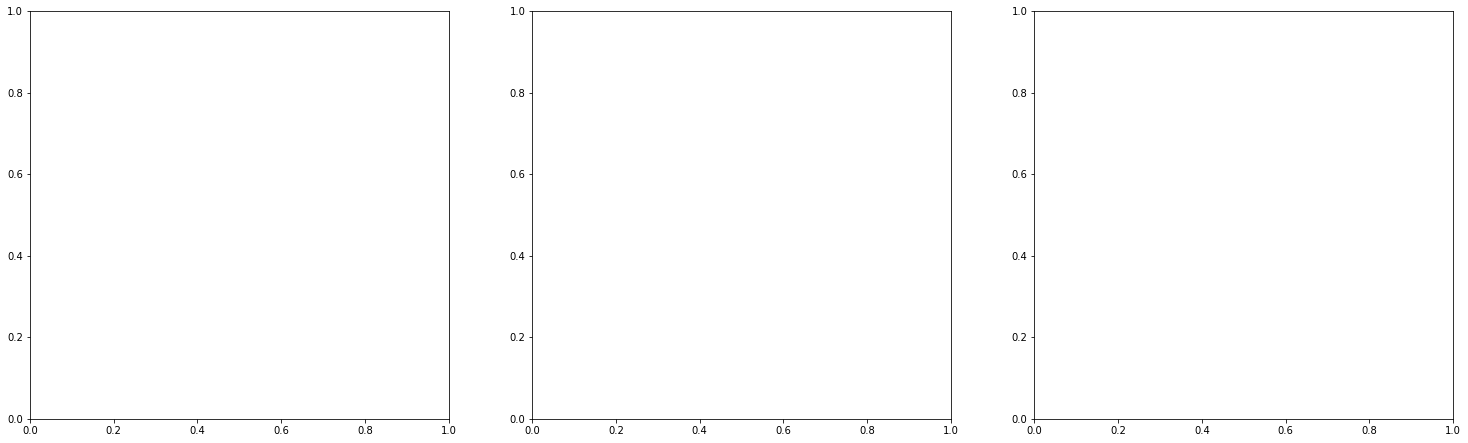

In [23]:
fig, axs = plt.subplots(1, 3)
fig.set_size_inches(25.5, 7.5)

balance[['Total Assets', 'Total Current Assets', 'Total Non-Current Assets']].plot.bar(ax=axs[0])
axs[0].set_title('Assets');
axs[0].set_ylabel("In SGD Million");

balance[['Cash, Cash Equivalents and Short Term Investments', 'Trade and Other Receivables, Current', 'Inventories']].plot.bar(ax=axs[1])
axs[1].set_title('Key Current Assets');
axs[1].set_ylabel("In SGD Million");

nppe = (balance['Net Property, Plant and Equipment']/balance['Total Non-Current Assets'])*100
nia = (balance['Net Intangible Assets']/balance['Total Non-Current Assets'])*100
tlti = (balance['Total Long Term Investments']/balance['Total Non-Current Assets'])*100

balance[['Net Property, Plant and Equipment', 'Net Intangible Assets', 'Total Long Term Investments']].plot.bar(ax=axs[2])
axs[2].set_title('Key Non-Current Assets');
axs[2].set_ylabel("In SGD Million");


## Liabilities

Within the **Liabilities** category, it is split between current liabilities and non-current liabilities.

**Current liabilities** are short-term liabilities that are expected to be paid off within 12 months:

1) Short-term Debt

 - Debt to be paid off within 12 months
 - Used to finance short-term needs

2) Accounts Payable

 - Opposite of *Account Receivables* 
 - Increasing amount might means company is purchasing *Inventories*, however, if *Inventories* remain unchanged but *Account Payable* is increasing. It might mean that company is short of cash and they are delaying payments.
 
**Non-current liabilities** are long-term debts that take more than 12 months to be paid off:
 
1) Long-term Debt
 
- Debt that can be cleared > 12 months
- Used to finance long-term assets. E.g. *Plants, Property & Equipment (PPEs)*

In [ ]:
fig, axs = plt.subplots(1, 3)
fig.set_size_inches(25.5, 7.5)

balance[['Total Liabilities', 'Total Current Liabilities', 'Total Non-Current Liabilities']].plot.bar(ax=axs[0])
axs[0].set_title('Liabilities');
axs[0].set_ylabel("In SGD Million");

balance[['Financial Liabilities, Current', 'Payables and Accrued Expenses, Current']].plot.bar(ax=axs[1])
axs[1].set_title('Current Liabilities');
axs[1].set_ylabel("In SGD Million");

balance[['Financial Liabilities, Non-Current', 'Tax Liabilities, Non-Current', 'Other Non-Current Liabilities']].plot.bar(ax=axs[2])
axs[2].set_title('Non-Current Liabilities');
axs[2].set_ylabel("In SGD Million");

## Shareholders’ Equity


In [ ]:
balance['Total Equity'].plot()
plt.title('Total Equity');
plt.ylabel("In SGD Million");

## Liquitity Ratios 

1) Current Ratio
 - *Current Assets* divided by *Current Liabilities*
 - Must be > 1 
 - < 1 means *Current Liabilities* are higher than *Current Assets*
 
2) Quick Ratio (Acid-Test)
 - *Current Assets* minus *Inventories* divided by *Current Liabilities*
 - Exclude *Inventories* as it may take time to sell off thus affect cash flow
 
3) Cash Ratio 
 - *Cash & Cash Equivalents/Marketable securities* divided by *Current Liabilities*
 - Cash is the most liquid assets, *Account Receivables* takes time to get back
 - Strictest out of all, testing the worse case scenario

In [ ]:
current = balance['Total Current Assets']/balance['Total Current Liabilities']
quick = (balance['Total Current Assets'] - balance['Inventories'])/balance['Total Current Liabilities']
cash = balance['Cash, Cash Equivalents and Short Term Investments']/balance['Total Current Liabilities']

lratios = pd.DataFrame({'Current Ratio': current, 'Quick Ratio': quick, 'Cash Ratio': cash})
lratios.plot()
plt.title('Liquitity Ratios ');